
# Tecnicas de selección de datos

In [13]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold,ShuffleSplit,LeavePOut, LeaveOneOut


In [14]:
# Cargar el dataset
data = load_wine()
X = data.data
y = data.target

# Mostrar la estructura del dataset
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['target'] = data.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
df_wine['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### Resustitución

La Resustitución es una técnica simple en la que usamos todos los datos disponibles tanto para el entrenamiento como para las pruebas. Aunque no es recomendable (debido a la posibilidad de sobreajuste), es importante comprenderla como punto de partida.

In [16]:
# Técnica de Resustitución
# Entrenamos y evaluamos con el mismo conjunto de datos
model = DecisionTreeClassifier(random_state=0)
model.fit(X, y)
accuracy_r = model.score(X, y)

print(f"accuracy utilizando Resustitución: {accuracy_r:.4f}")


accuracy utilizando Resustitución: 1.0000


### Partición (Hold-Out)
En la técnica de Partición o Hold-Out, dividimos el conjunto de datos en dos subconjuntos: uno para el entrenamiento y otro para las pruebas. Esta es una de las técnicas más comunes.

In [17]:
# Dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Entrenamos el modelo con el conjunto de entrenamiento
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Evaluamos el modelo con el conjunto de test
accuracy_p = model.score(X_test, y_test)

print(f"accuracy utilizando Partición (Hold-Out): {accuracy_p:.4f}")


accuracy utilizando Partición (Hold-Out): 0.9444


### Validación Cruzada (Cross Validation)
La Validación Cruzada es una técnica más robusta que divide los datos en múltiples bloques. En cada iteración, uno de los bloques se utiliza como test y el resto para el entrenamiento. Esto reduce el riesgo de sobreajuste y da una evaluación más estable del modelo

#### KFold Cross Validation

El conjunto de entrenamiento se divide en k conjuntos más pequeños. Se sigue el siguiente procedimiento para cada uno de los k “pliegues”:

Un modelo se entrena usando **k-1** de los pliegues como datos de entrenamiento;el modelo resultante se valida con la parte restante de los datos (es decir, se utiliza como conjunto de pruebas para calcular una medida de rendimiento como la precisión).

La medida de rendimiento informada por la validación cruzada k veces es entonces el promedio de los valores calculados en el bucle.

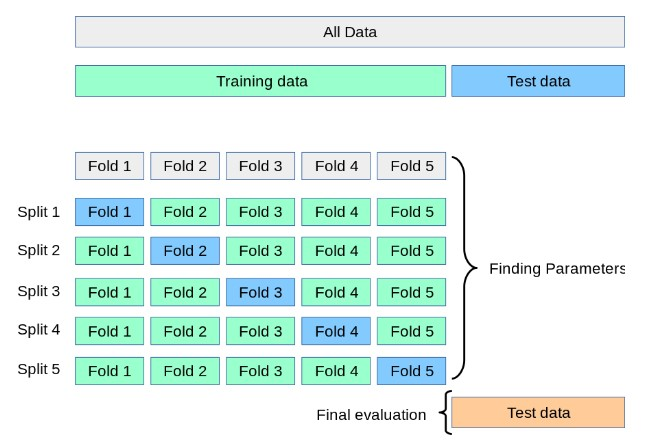

In [18]:
# Usamos 5 bloques (K-Fold Cross Validation)
model = DecisionTreeClassifier(random_state=0)
kf = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kf)

print(f"accuracy utilizando Validación Cruzada: {scores.mean():.4f}")



accuracy utilizando Validación Cruzada: 0.8368


#### K-Fold Cross Validation con Shuffle

Es una variación de la validación cruzada básica donde los datos se barajan (shuffle) antes de dividirse en k pliegues. Este método asegura que cada pliegue sea más representativo del conjunto completo y es especialmente útil cuando los datos pueden tener un orden inherente.

El iterador ShuffleSplit generará un número definido por el usuario de divisiones independientes de conjuntos de datos de prueba/entrenamiento. Las muestras primero se mezclan y luego se dividen en un par de conjuntos de entrenamiento y de prueba.

Es posible controlar la aleatoriedad para la reproducibilidad de los resultados sembrando explícitamente el generador de números pseudoaleatorios random_state.

In [19]:
model = DecisionTreeClassifier(random_state=0)

cvs = ShuffleSplit(n_splits=5,random_state=0)

scores_s= cross_val_score(model, X, y, cv=cvs)


print(f"accuracy utilizando Validación Cruzada con Shuffle: {scores_s.mean():.4f}")

accuracy utilizando Validación Cruzada con Shuffle: 0.9778


#### Stratified k-fold

StratifiedKFold es una variación de k-fold que devuelve pliegues estratificados: cada conjunto contiene aproximadamente el mismo porcentaje de muestras de cada clase objetivo que el conjunto completo.


In [20]:
model = DecisionTreeClassifier(random_state=0)

skf = StratifiedKFold(n_splits=5)


scores_skf= cross_val_score(model, X, y, cv=skf)


print(f"accuracy utilizando StratifiedKFold: {scores_s.mean():.4f}")

accuracy utilizando StratifiedKFold: 0.9778


#### Exclusión Individual (Leave One Out)
La técnica de Exclusión Individual (Leave-One-Out) es un caso extremo de validación cruzada. Cada instancia del conjunto de datos se usa una vez como conjunto de test, mientras que el resto se usa para el entrenamiento. Este enfoque es más costoso computacionalmente, pero se utiliza para datasets pequeños.

In [21]:
# Técnica de Exclusión Individual (Leave One Out)
loo = LeaveOneOut()
model = DecisionTreeClassifier(random_state=0)

# Cross-validation usando Leave-One-Out
scores_l = cross_val_score(model, X, y, cv=loo)

print(f"accuracy utilizando Exclusión Individual (Leave-One-Out): {scores_l.mean():.4f}")


accuracy utilizando Exclusión Individual (Leave-One-Out): 0.8820


####  Leave P Out (LPO)

LeavePOut es muy similar a LeaveOneOut ya que crea todos los conjuntos de entrenamiento/prueba posibles eliminando
muestras del juego completo.



In [22]:
lpo = LeavePOut(p=2)
model = DecisionTreeClassifier(random_state=0)

scores_p = cross_val_score(model, X, y, cv=lpo)

print(f"accuracy utilizando(Leave-P-Out): {scores_p.mean():.4f}")

accuracy utilizando(Leave-P-Out): 0.8845
